In [3]:
import pandas as pd


In [9]:
import pandas as pd

path ="C:\\Users\\Fahid\\Desktop\\data121.csv"
 

In [10]:
df

,X1,X2,Y
0,45,11,0
1,67,12,1
2,23,1,1
3,36,14,1
4,89,15,0
5,46,16,1
6,11,17,0
7,23,18,0
8,43,19,1
9,76,20,1


In [11]:
X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
Y=df['Y'].values.tolist()
print(X1)
print(X2)
print(Y)

[45, 67, 23, 36, 89, 46, 11, 23, 43, 76, 12, 47, 21, 88, 56, 49, 29, 33, 44, 55, 66, 77, 88, 99, 11, 12, 13, 14, 15, 16, 17, 18, 24, 25, 26, 27, 28, 29, 31, 32, 33, 43, 34, 35, 36, 37, 38, 39, 99, 11]
[11, 12, 1, 14, 15, 16, 17, 18, 19, 20, 31, 32, 11, 22, 33, 44, 55, 66, 77, 88, 99, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 56, 58, 59, 71, 73, 67, 87, 49, 34, 29, 87, 84, 67, 82, 67, 12, 99]
[0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]


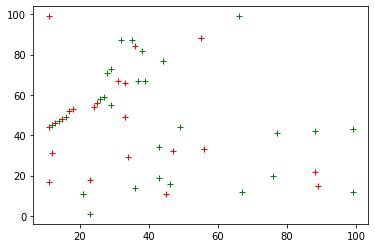

In [12]:
import matplotlib.pyplot as plt
import math
import random
from IPython import display
from scipy.signal import savgol_filter
plt.figure()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i], "r+")
    else:
        plt.plot(X1[i],X2[i],"g+")
plt.show()

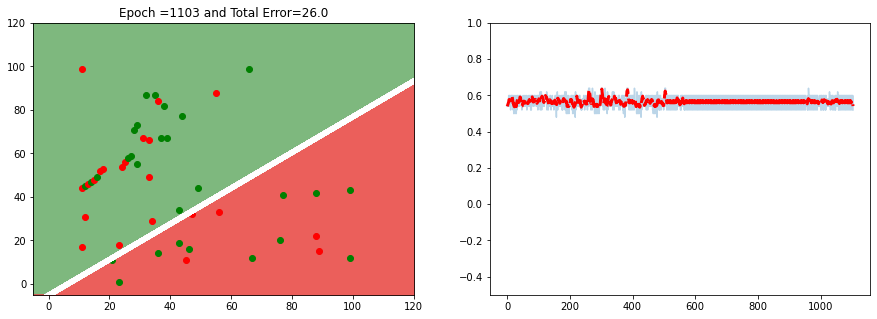

Epoch: 1103 Loss: 0.52 and y=[-9.330450057927663, 93.31646092183702] and x=6.362312281086353


In [ ]:

W=[random.random(), random.random()]
b=random.random()
lr=0.5

theta=0.5
epoch=0
count=0
loss=[]
while count < len(X1):
    total_error=0
    for i in range(len(X1)):
        ws=W[0]*X1[i]+W[1]*X2[i]+b
        pred=0
        if ws > theta:
            pred=1
        
        error = Y[i]-pred
        if error!=0:
            count=0
            total_error+=math.sqrt(error**2)
            W[0]+=lr*error*X1[i]
            W[1]+=lr*error*X2[i]
            b+=lr*error
        else:
            count+=1
    loss.append(1/len(X1)*total_error)
    plt.figure(figsize=(15,5))
    
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
    for i in range(len(Y)):
        if Y[i]==0:
            plt.plot(X1[i],X2[i], "ro")
        else:
            plt.plot(X1[i],X2[i],"go")
        plt.xlim(-5,120)
        plt.ylim(-5,120)
        xint=(theta-b)/W[0]
        yint=(theta-b)/W[1]
        slope=-yint/xint
        x=plt.xlim()
        y=[]
        for i in x:
            y.append(slope*i+yint)
        plt.plot(x,y, 'w-',linewidth=5)
        plt.fill_between(x=[-5,120],y1=-5,y2=120, color='g',alpha=.01)
        plt.fill_between(x=[-5,120],y1=-5,y2=y, color='#F05F5F',alpha=.4)
        #plt.fill_between(x=[-5,120],y1=y,y2=-5, color='g')
        
    plt.title(f"Epoch ={epoch} and Total Error={total_error}")
    plt.subplot(1,2,2)
    plt.ylim([-.5,1])
    plt.plot(loss, alpha=0.3)
    if epoch > 10:
        avg = savgol_filter(loss, 11, 3) # window size 51, polynomial order 3
        plt.plot(avg, 'r--', lw=3)
    
    plt.show()
    print(f"Epoch: {epoch} Loss: {loss[-1]} and y={y} and x={xint}")
    epoch+=1